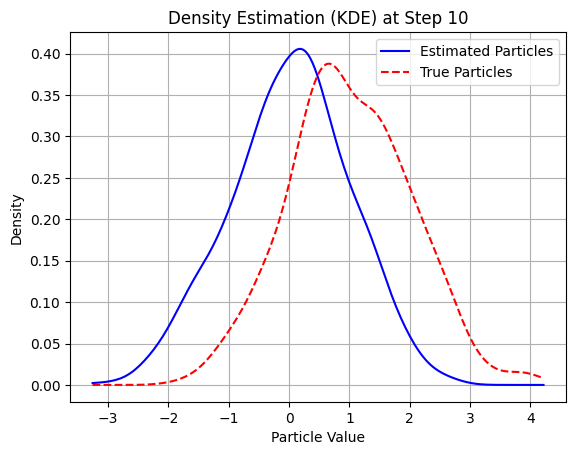

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def plot_kde(f_particles, f_true_particles, step):
    """Plots the KDE estimation of given particles."""

    # Convert PyTorch tensors to NumPy arrays
    f_particles = f_particles.detach().numpy()
    f_true_particles = f_true_particles.detach().numpy()

    # Define grid for KDE evaluation
    x_min, x_max = min(f_particles.min(), f_true_particles.min()), max(f_particles.max(), f_true_particles.max())
    x_vals = np.linspace(x_min, x_max, 200)

    # Estimate densities using KDE
    kde_particles = gaussian_kde(f_particles)
    kde_true_particles = gaussian_kde(f_true_particles)

    # Plot KDE curves
    plt.plot(x_vals, kde_particles(x_vals), label="Estimated Particles", linestyle="-", color="blue")
    plt.plot(x_vals, kde_true_particles(x_vals), label="True Particles", linestyle="--", color="red")

    # Formatting
    plt.title(f'Density Estimation (KDE) at Step {step}')
    plt.xlabel("Particle Value")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

# Example usage
f_particles = torch.randn(1000)  # Estimated particles
f_true_particles = torch.randn(1000) + 1  # True particles (shifted)
step = 10  # Example step number

plot_kde(f_particles, f_true_particles, step)


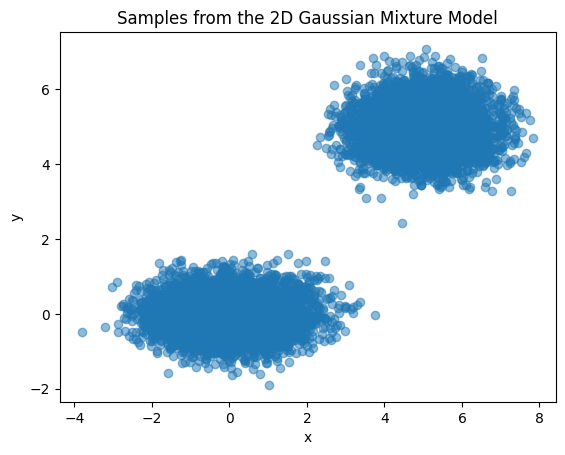

In [30]:
from torch.distributions import Normal, Categorical, Independent
from torch.distributions.mixture_same_family import MixtureSameFamily

# Adjust the means to separate the Gaussians more
means = torch.tensor([[0., 0.], [5., 5.]])  # Increased separation between the means
stds = torch.rand(2, 2)  # Standard deviations remain random

mix = Categorical(torch.ones(2,))
comp = Independent(Normal(means, stds), 1)
gmm = MixtureSameFamily(mix, comp)

true_samples = gmm.sample((10000,)).detach().numpy()  # generate 1000 samples
samples = true_samples

# Plotting the samples
plt.scatter(true_samples[:, 0], true_samples[:, 1], alpha=0.5)
plt.title('Samples from the 2D Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


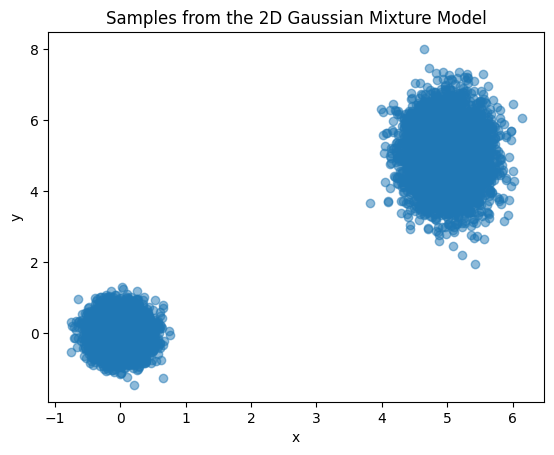

In [28]:
# To sample from this mixture model:
true_samples = gmm.sample((10000,)).detach().numpy()  # generate 1000 samples
samples = true_samples

# Plotting the samples
plt.scatter(true_samples[:, 0], true_samples[:, 1], alpha=0.5)
plt.title('Samples from the 2D Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [2]:
import torch
import torch.distributions as dist

# Define a normal distribution with mean 0 and standard deviation 1
normal_dist = dist.Normal(torch.Tensor([1, 2]), torch.ones(2, 2))

# Get the event shape (dimension of the samples)
event_shape = normal_dist.event_shape

print("Event shape:", event_shape)

Event shape: torch.Size([])


In [6]:
from models import NCSN, MLP2D
from data import TwoDimDataClass
import torch


target_ds = TwoDimDataClass(dataset_type='mixture_of_gaussians',
                            N=1000,
                            batch_size=256)

reference_ds = TwoDimDataClass(dataset_type='gaussian_centered',
                               N=1000,
                               batch_size=256)

In [7]:
data = reference_ds

In [8]:
print(data)